In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('E:\File Dzaky\MSIB\Heart Disease Prediction\heart.csv')

In [46]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [48]:
df.shape

(1025, 14)

# 1.  Data Description



Feature | Explanation
--- | ---
age | The age of the patients
sex | The sex of the patients (0 = female, 1 = male)
cp | The type of chest pain the patient experienced (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)
trestbps | The patients resting blood pressure (mm/hg)
chol | The patients serum cholesterol level (mg/dl)
fbs | The patients fasting blood sugar level (> 120 mg/dL = 1, <= 120 mg/dL = 0)
restecg | The patients resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy)
thalach | The patients maximum heart rate achieved during exercise
exang | Whether or not the patient experienced angina during exercise (0 = no, 1 = yes, )
oldpeak | The ST depression induced by exercise relative to rest
slope | The slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)
ca | The number of major blood vessels colored by flourosopy (0-3)
thal | A variable indicating the patient's thalassemia (1 = normal, 2 = fixed defect, 3 = reversible defect)
target | The presence of heart disease in the patients (0 = no disease, 1 = heart disease)

*Categorical data = sex, cp, fbs, restecg, exang, slope, ca, thal, target

*Continuous data = age, trestbps, chol, thalach, oldpeak

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


# 2. Exploratory Data Analysis (EDA)

In [50]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

Fitur 'ca' memiliki range antara 0-3, namun, df.nunique() menampilkan bahwa 'ca' memiliki range antara 0-4. temukan data '4' dan mengubahnya menjadi NaN.

In [51]:
df['ca'].nunique()

5

In [52]:
df.ca.value_counts()

ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64

Terdapat 18 row dengan value 4 dalam variabel 'ca', yang akan diubah menjadi NaN, dan diisi kembali dengan mediannya

In [53]:
df.loc[df['ca']==4, 'ca'] = np.NaN

In [54]:
df.ca.value_counts()

ca
0.0    578
1.0    226
2.0    134
3.0     69
Name: count, dtype: int64

In [55]:
df['thal'].nunique()

4

Fitur 'thal' memiliki range antara 1-3, namun, df['thal'].nunique() menampilkan bahwa 'thal' memiliki range antara 0-3, temukan data dengan value '0' dan akan dibuah menjadi NaN.

In [56]:
df.thal.value_counts()

thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64

Terdapat 7 row dengan value 0 didalam variabel 'thal', yang akan diubah menjadi NaN dan akan diisi kembali dengan mediannya.

In [57]:
df.loc[df['thal']==0, 'thal'] = np.NaN

In [58]:
df.thal.value_counts()

thal
2.0    544
3.0    410
1.0     64
Name: count, dtype: int64

## Handling Missing Value

In [59]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca          18
thal         7
target       0
dtype: int64

Sekarang, didalam dataframe yang kita punya memiliki missing value yang disebabkan perubahan data anomali menjadi NaN.

Missing value akan diisi berdasarkan median dari masing-masing variabel

In [60]:
df = df.fillna(df.median()) # Fill missing values with median
df.isnull().sum() # Check the changes

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Duplicate Entry

In [61]:
duplicate = df.duplicated().sum()
print('Duplicate entry pada dataset berjumlah = ', duplicate, 'row')

Duplicate entry pada dataset berjumlah =  723 row


In [62]:
df.drop_duplicates(inplace = True) #Menghapus duplicate entry
df.shape

(302, 14)

## Outliers

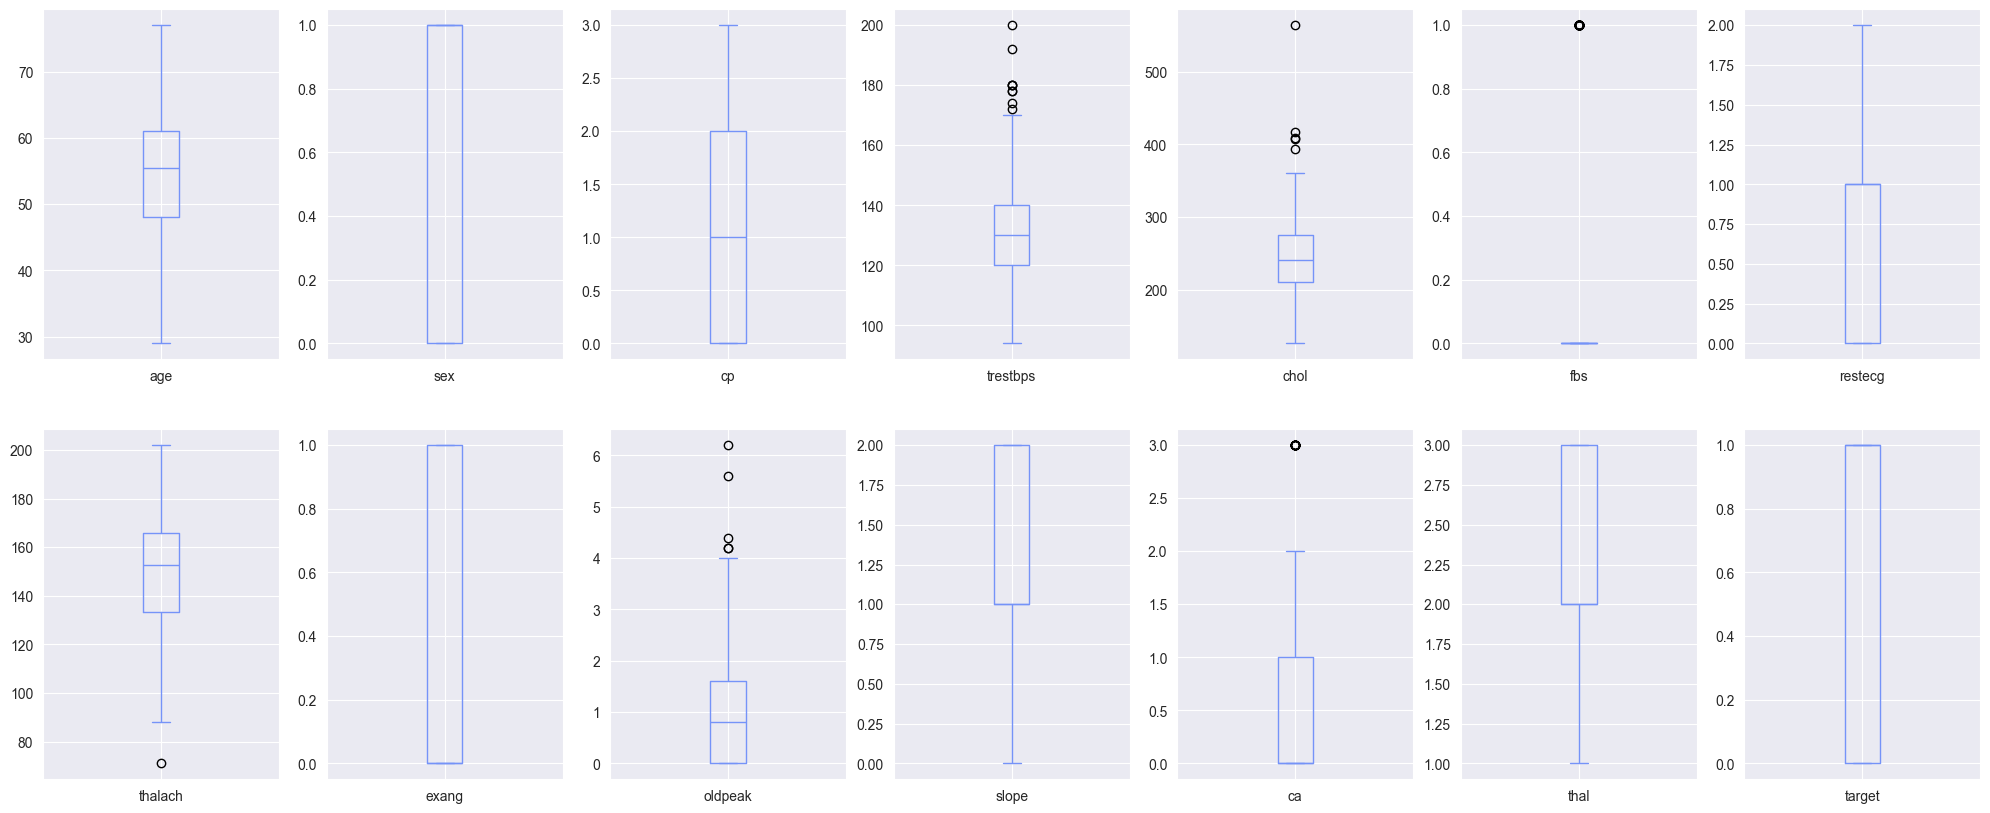

In [63]:
# Visualize boxplot to check the outliers
df.plot(kind = 'box', subplots = True, layout = (2,7),
sharex = False, sharey = False, figsize = (25, 10), color = '#7593F8');

Terdapat outlier-outlier yang di temukan pada fitur-fitur yang tersedia, lalu kita bisa menghapus outlier dari continous variabel.

In [64]:
continuous_features = ['age','trestbps','chol','thalach','oldpeak']

def remove_outliers(df, continuous_features):
    # Iterate over the continuous features
    for feature in continuous_features:
        # Calculate the 25th and 75th percentiles (Q1 and Q3)
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        # Calculate the interquartile range (IQR)
        IQR = Q3 - Q1
        # Define the outlier step
        outlier_step = 1.5 * IQR
        # Identify outliers
        outliers = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)]
        # Remove outliers from the dataframe
        df = df[~df.isin(outliers)].dropna()
        # Print the number of outliers detected and removed
        print('Number of outliers detected and removed from {} feature: {}'.format(feature, outliers.shape[0]))

    return df

# Remove outliers from the heart dataset
df = remove_outliers(df, continuous_features)

Number of outliers detected and removed from age feature: 0
Number of outliers detected and removed from trestbps feature: 9
Number of outliers detected and removed from chol feature: 5
Number of outliers detected and removed from thalach feature: 1
Number of outliers detected and removed from oldpeak feature: 4


age            Axes(0.125,0.53;0.0945122x0.35)
sex         Axes(0.238415,0.53;0.0945122x0.35)
cp          Axes(0.351829,0.53;0.0945122x0.35)
trestbps    Axes(0.465244,0.53;0.0945122x0.35)
chol        Axes(0.578659,0.53;0.0945122x0.35)
fbs         Axes(0.692073,0.53;0.0945122x0.35)
restecg     Axes(0.805488,0.53;0.0945122x0.35)
thalach        Axes(0.125,0.11;0.0945122x0.35)
exang       Axes(0.238415,0.11;0.0945122x0.35)
oldpeak     Axes(0.351829,0.11;0.0945122x0.35)
slope       Axes(0.465244,0.11;0.0945122x0.35)
ca          Axes(0.578659,0.11;0.0945122x0.35)
thal        Axes(0.692073,0.11;0.0945122x0.35)
target      Axes(0.805488,0.11;0.0945122x0.35)
dtype: object

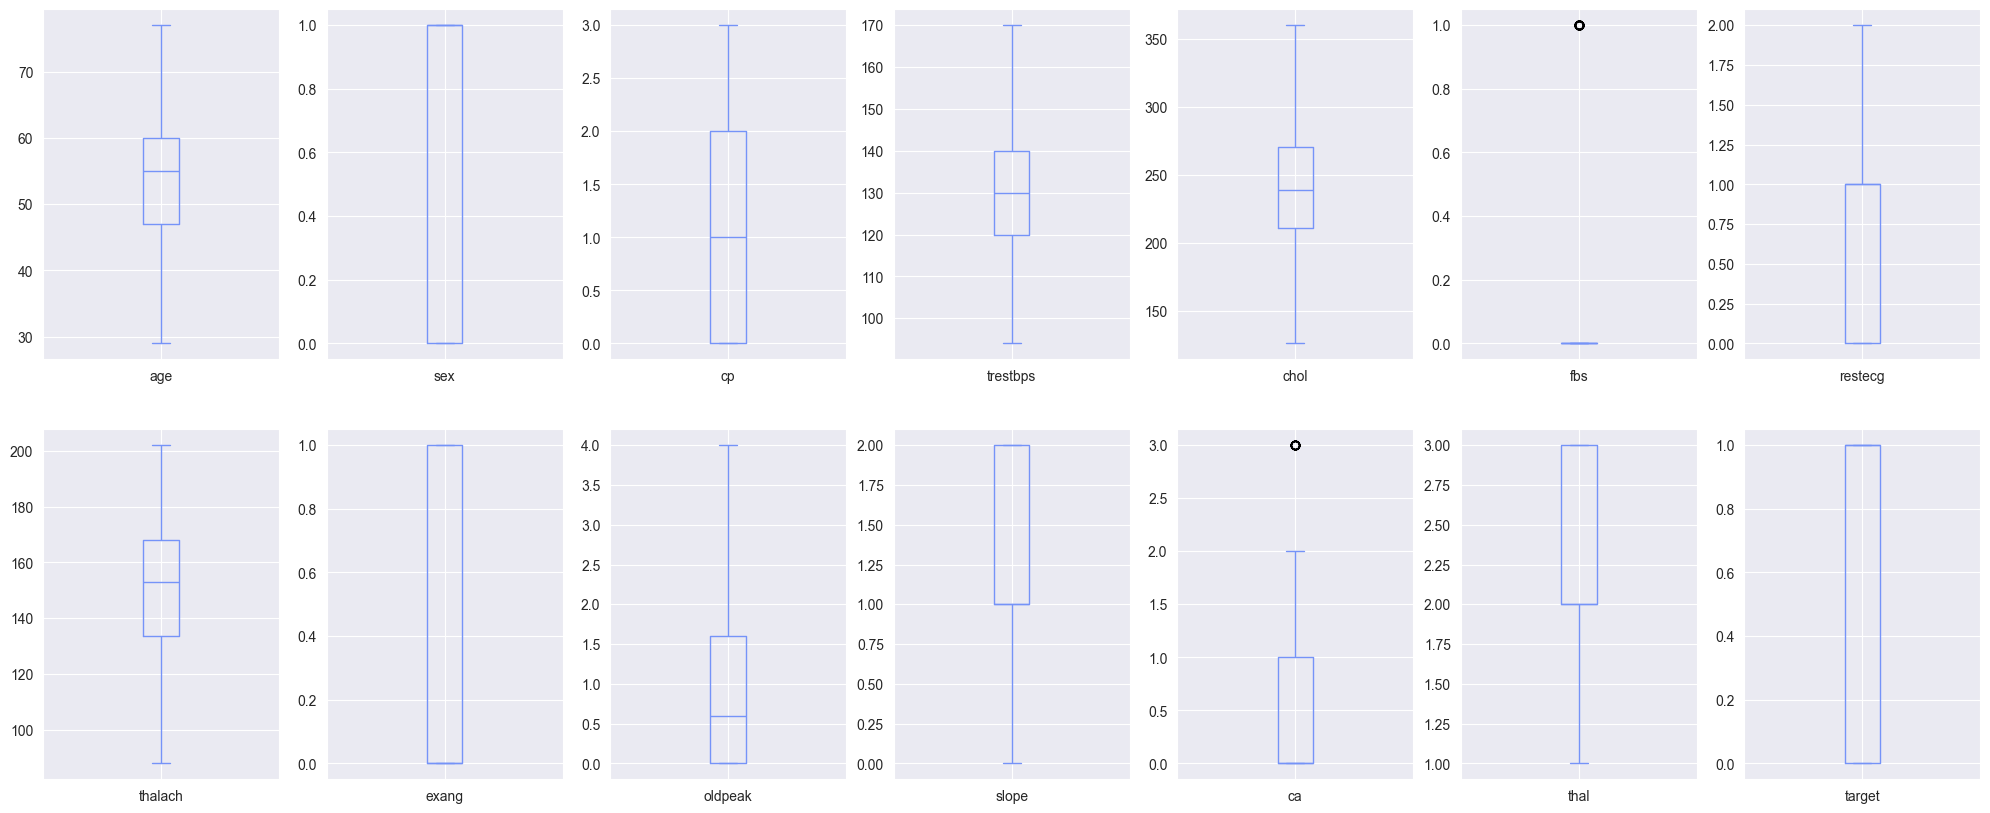

In [65]:
df.plot(kind = 'box', subplots = True, layout = (2,7),
sharex = False, sharey = False, figsize = (25, 10), color = '#7593F8')

Outlier-outlier yang ada pada continous variabel sebelumnya telah di hapus.

## Summary Statistics

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,283.0,54.049470,9.128186,29.0,47.0,55.0,60.0,77.0
sex,283.0,0.699647,0.459224,0.0,0.0,1.0,1.0,1.0
cp,283.0,0.985866,1.031324,0.0,0.0,1.0,2.0,3.0
trestbps,283.0,129.883392,15.387795,94.0,120.0,130.0,140.0,170.0
chol,283.0,242.314488,44.654188,126.0,210.5,239.0,270.5,360.0
fbs,283.0,0.141343,0.348992,0.0,0.0,0.0,0.0,1.0
restecg,283.0,0.522968,0.514336,0.0,0.0,1.0,1.0,2.0
thalach,283.0,149.961131,22.691625,88.0,133.5,153.0,168.0,202.0
exang,283.0,0.318021,0.466533,0.0,0.0,0.0,1.0,1.0
oldpeak,283.0,0.951943,1.026400,0.0,0.0,0.6,1.6,4.0


Setelah kita menghapus outlier dan mengisi nilai yang hilang dengan median, kita dapat melihat bahwa nilai dalam ringkasan statistik telah berubah.

## Distribusi Data

### Continous Variable

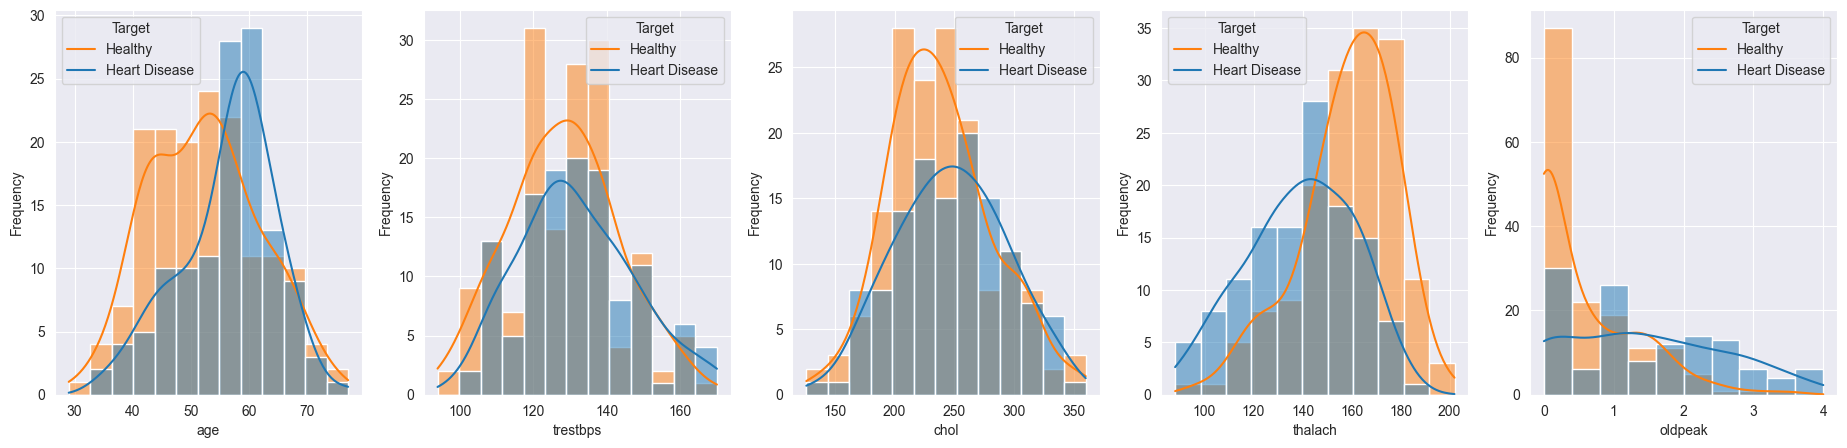

In [67]:
sns.set_style("darkgrid")
sns.husl_palette(h = .5)

# Plot the distributions of continuous variables
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (23,5))
for i, feature in enumerate(continuous_features):
    sns.histplot(data = df, x = feature, kde = True, hue = 'target', ax = axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")
    axes[i].legend(title = "Target", labels = ["Healthy", "Heart Disease"])

In [68]:
df[continuous_features].skew().round(2)

age        -0.14
trestbps    0.26
chol        0.20
thalach    -0.48
oldpeak     0.92
dtype: float64

Seperti yang dapat kita lihat di atas, usia dan thalach mempunyai skewness negatif. Selain itu, trestbps, chol, dan oldpeak mempunyai skewness positif.

### Categorical Variable

#### Distribusi Gender berdasarkan Target (No disease & Heart disease)

Text(0.5, 0, '1 = Male, 0 = Female')

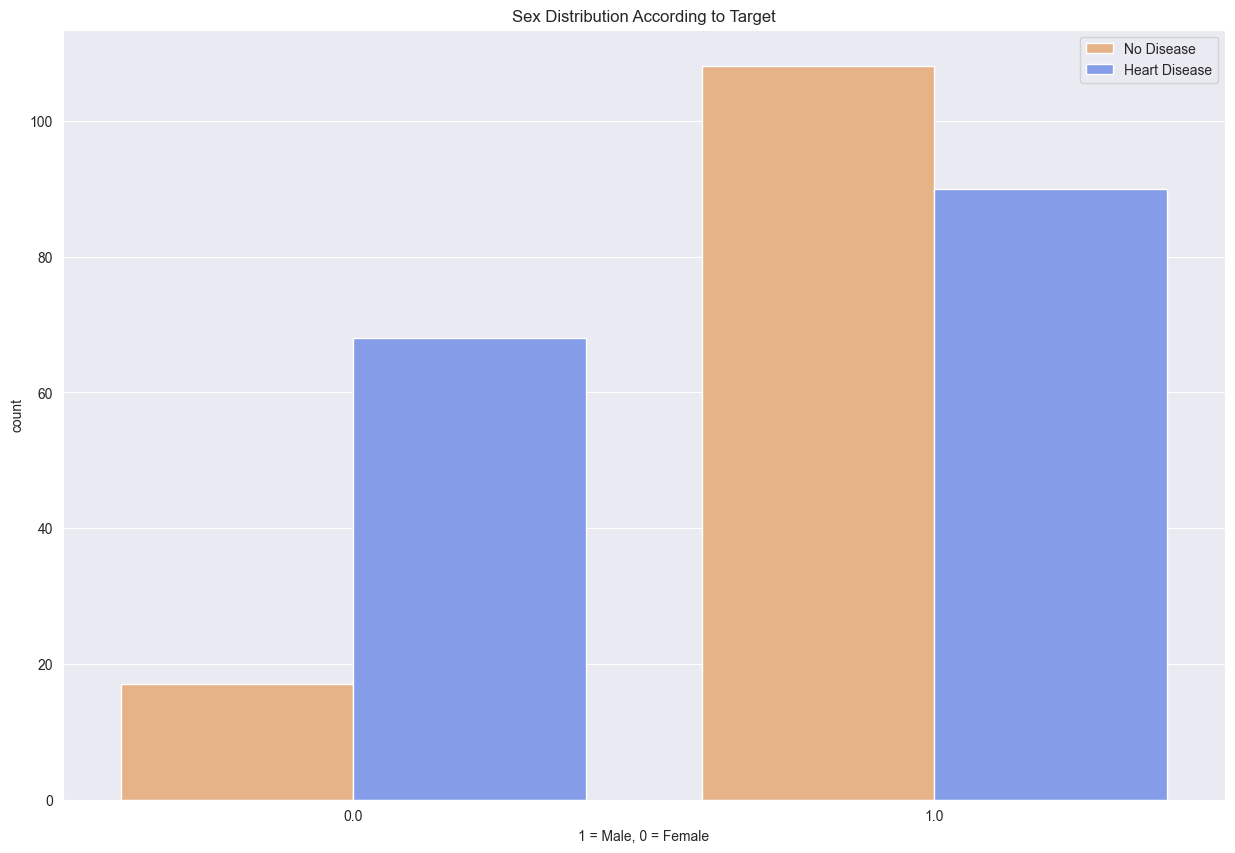

In [69]:
sns.countplot(x = 'sex', hue = 'target', data = df, palette = ["#F4B278", "#7593F8"]).set_title('Sex Distribution According to Target')
plt.legend(labels = ['No Disease', 'Heart Disease'])
plt.xlabel('1 = Male, 0 = Female')

In [70]:
df.groupby(['target'])['sex'].value_counts()

target  sex
0.0     1.0    108
        0.0     17
1.0     1.0     90
        0.0     68
Name: count, dtype: int64

**Insight:** Pasien wanita (108 pasien) yang menderita penyakit jantung lebih banyak dibandingkan pasien laki-laki (90 pasien).

####Distribusi Chest Pain berdasarkan Target (No disease & Heart disease)

Text(0.5, 0, '0=typical angina, 1=atypical angina, 2=non-anginal pain, 3=asymptomatic')

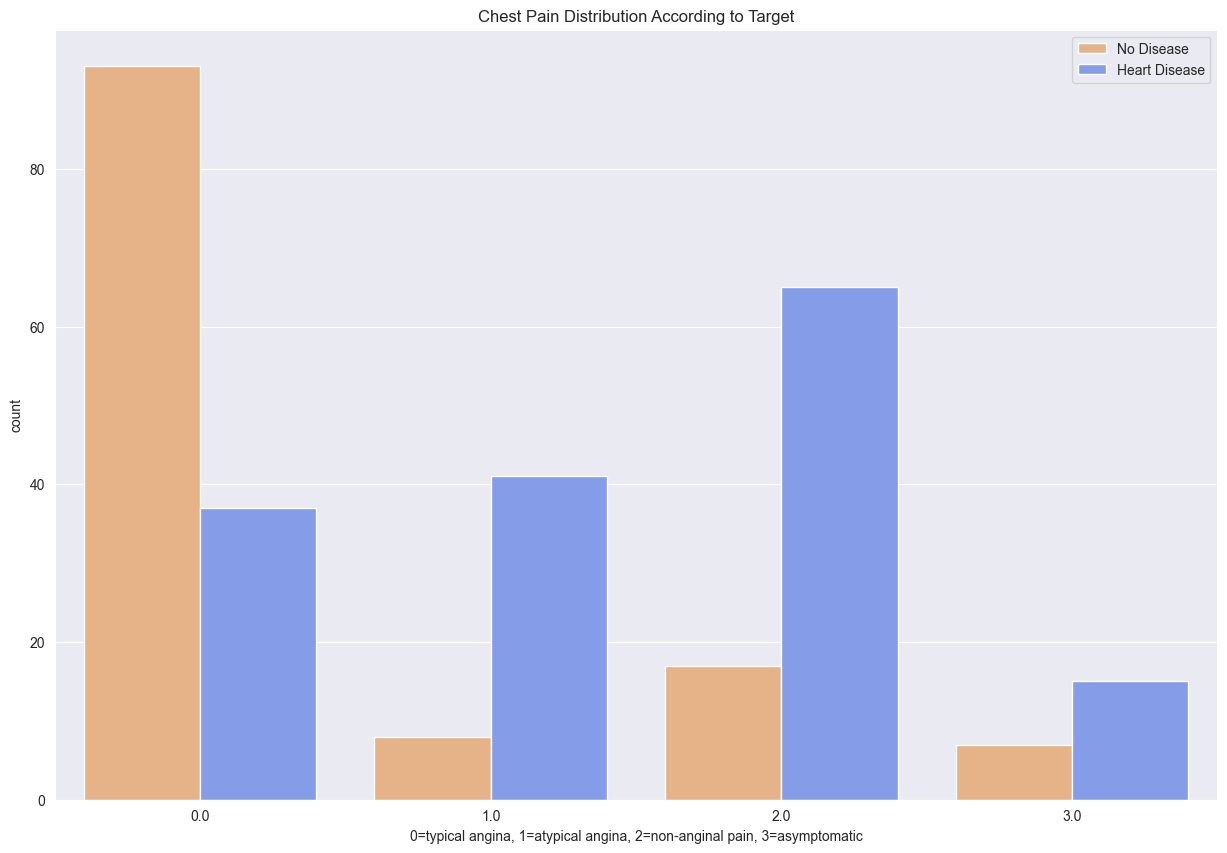

In [71]:
sns.countplot(x = 'cp', hue = 'target', data = df, palette = ["#F4B278", "#7593F8"]).set_title('Chest Pain Distribution According to Target')
plt.legend(labels = ['No Disease', 'Heart Disease'])
plt.xlabel('0=typical angina, 1=atypical angina, 2=non-anginal pain, 3=asymptomatic')

In [72]:
df.groupby(['target'])['cp'].value_counts()

target  cp 
0.0     0.0    93
        2.0    17
        1.0     8
        3.0     7
1.0     2.0    65
        1.0    41
        0.0    37
        3.0    15
Name: count, dtype: int64

**Insight:** melihat grafik di atas,  jumlah pasien yang lebih tinggi tanpa penyakit jantung yang mengalami typical angina (93 pasien).  Dengan kata lain, sebagian besar pasien tanpa penyakit jantung mengalami nyeri dada.

####Distribusi Fasting Blood Sugar berdasarkan Target (No disease & Heart disease)

Text(0.5, 0, '0 = fbs <= 120, 1 = fbs > 120 ')

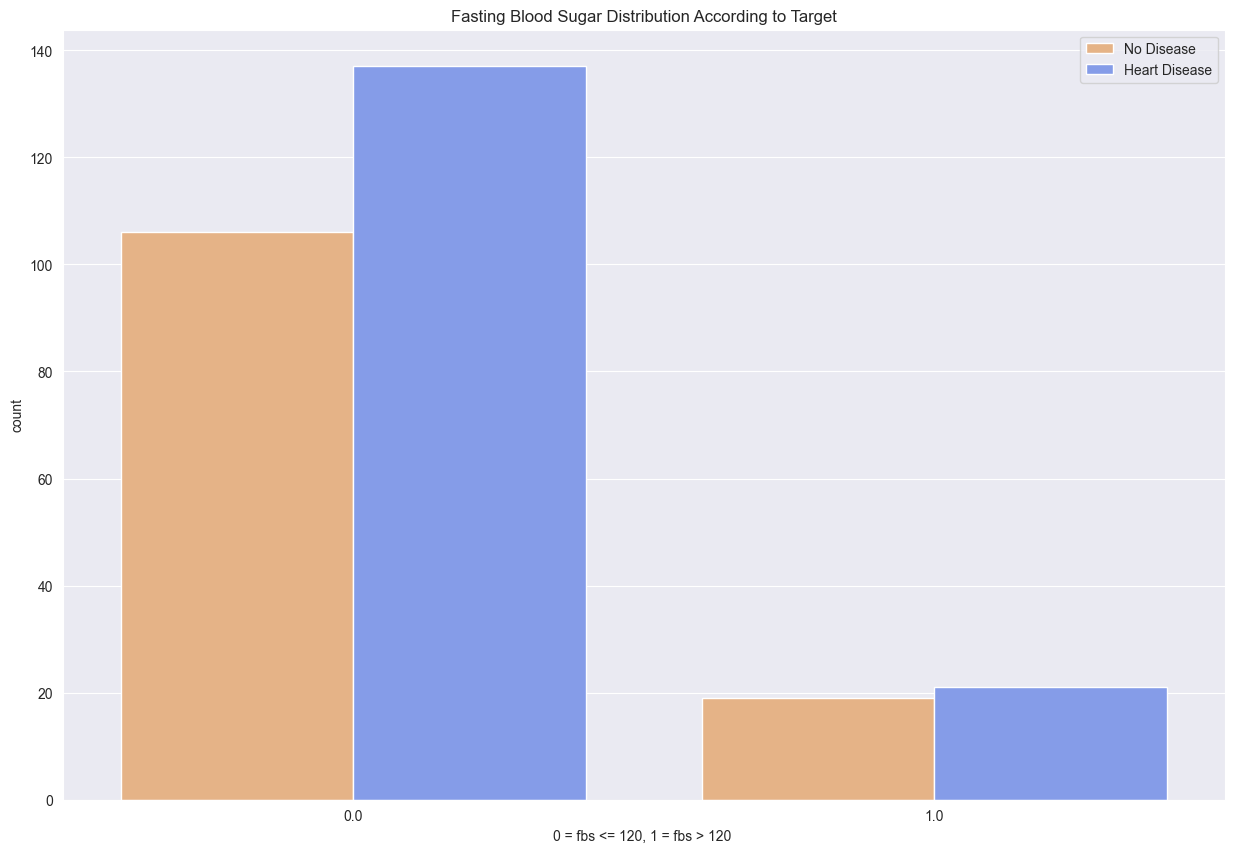

In [73]:
sns.countplot(x = 'fbs', hue = 'target', data = df, palette = ["#F4B278", "#7593F8"]).set_title('Fasting Blood Sugar Distribution According to Target')
plt.legend(labels = ['No Disease', 'Heart Disease'])
plt.xlabel('0 = fbs <= 120, 1 = fbs > 120 ')

In [74]:
df.groupby(['target'])['fbs'].value_counts()

target  fbs
0.0     0.0    106
        1.0     19
1.0     0.0    137
        1.0     21
Name: count, dtype: int64

**Insight:** Grafik di atas menunjukkan lebih banyak pasien dengan penyakit jantung memiliki fbs (Fasting Blood Sugar) <= 120 mg/dL dibandingkan dengan pasien tanpa penyakit jantung yang memiliki fbs <= 120 mg/dL.  Hal ini menunjukkan bahwa fbs mungkin bukan fitur yang kuat untuk membedakan antara pasien dengan penyakit jantung dan pasien tanpa penyakit jantung.

####Distribusi Resting ECG berdasarkan Target (No disease & Heart disease)

Text(0.5, 0, '0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy')

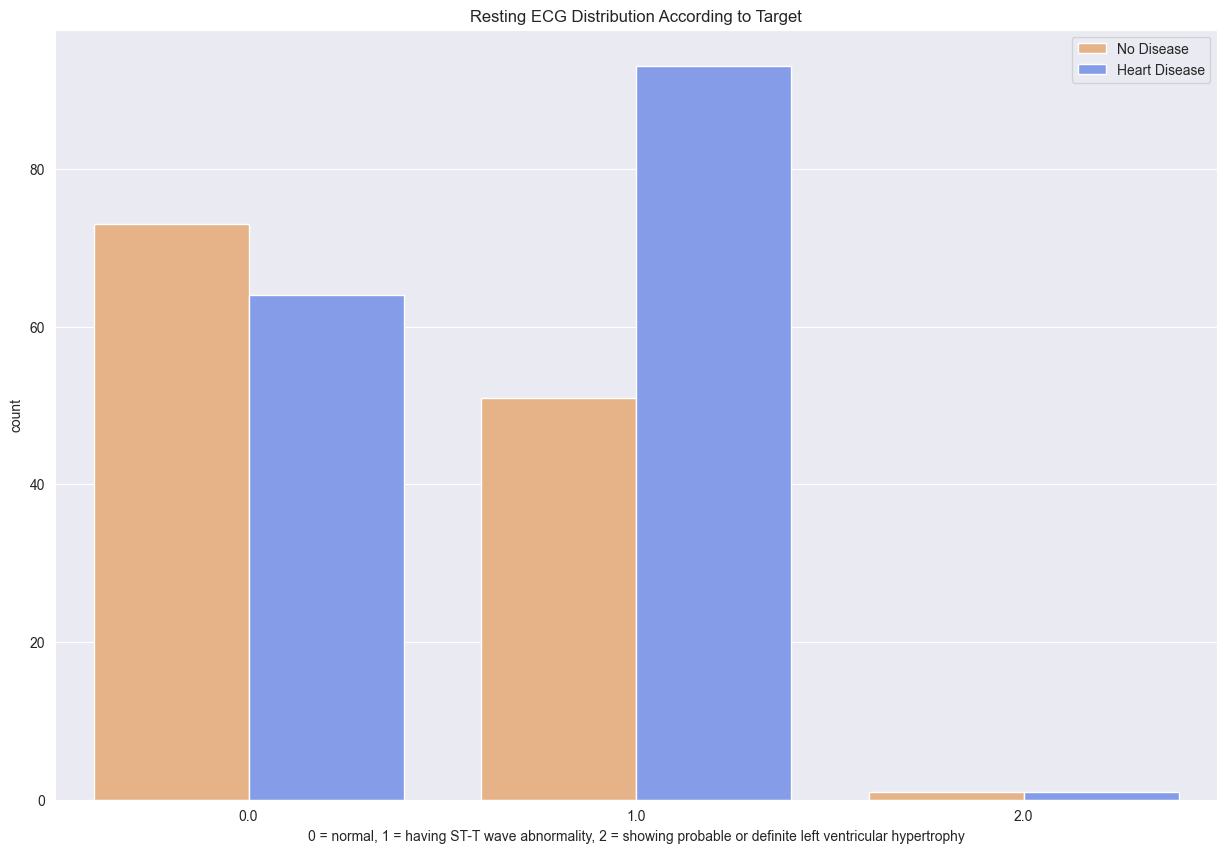

In [75]:
sns.countplot(x = 'restecg', hue = 'target', data = df, palette = ["#F4B278", "#7593F8"]).set_title('Resting ECG Distribution According to Target')
plt.legend(labels = ['No Disease', 'Heart Disease'])
plt.xlabel('0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy')

In [76]:
df.groupby(['target'])['restecg'].value_counts()

target  restecg
0.0     0.0        73
        1.0        51
        2.0         1
1.0     1.0        93
        0.0        64
        2.0         1
Name: count, dtype: int64

**Insight:** Resting electrocardiographic (restecg) adalah fitur yang mengukur aktivitas listrik jantung saat seseorang sedang istirahat.  Dalam grafik di atas, terlihat bahwa sebagian besar pasien dengan penyakit jantung (93 pasien) memiliki kelainan gelombang ST-T (ditandai angka 1). Kelainan ini dapat menunjukkan adanya iskemia atau bentuk lain dari penyakit jantung pada pasien tersebut.

####Distribusi Excercise Induced Angina (exang) berdasarkan Target (No disease & Heart disease)

Text(0.5, 0, 'exang (0 = No, 1 = Yes)')

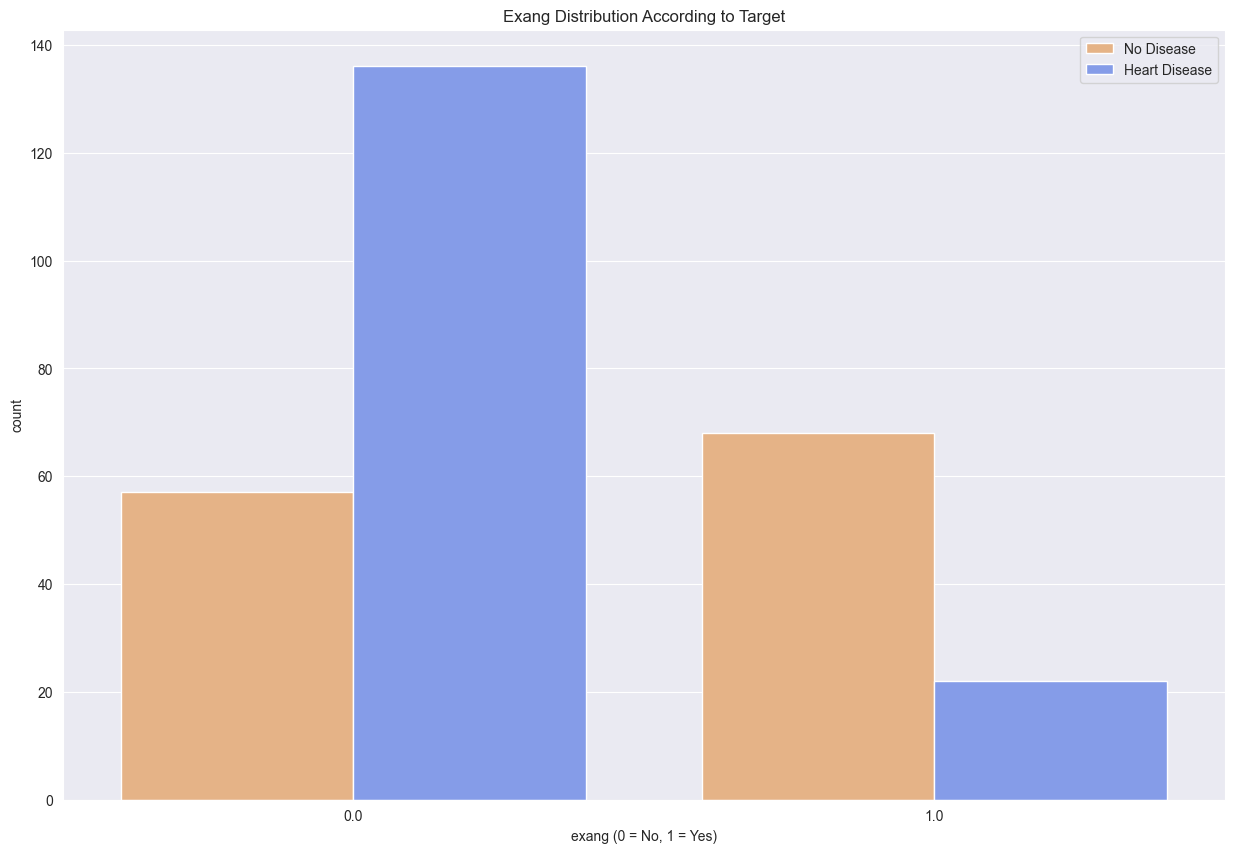

In [77]:
sns.countplot(x = 'exang', hue = 'target', data = df, palette = ["#F4B278", "#7593F8"]).set_title('Exang Distribution According to Target')
plt.legend(labels = ['No Disease', 'Heart Disease'])
plt.xlabel('exang (0 = No, 1 = Yes)')

In [78]:
df.groupby(['target'])['exang'].value_counts()

target  exang
0.0     1.0       68
        0.0       57
1.0     0.0      136
        1.0       22
Name: count, dtype: int64

**Insight:** Excercise induced angina  adalah nyeri dada atau ketidaknyamanan yang terjadi selama latihan fisik. Angina terjadi ketika otot jantung tidak mendapatkan cukup aliran darah dan oksigen, sehingga menyebabkan nyeri atau ketidaknyamanan di dada. Di sini, lebih banyak pasien penyakit jantung (136 pasien) tidak mengalami angina akibat olahraga.

####Distribusi Thal berdasarkan Target (No disease & Heart disease)

Text(0.5, 0, '1=normal, 2=fixed defect, 3=reversible defect')

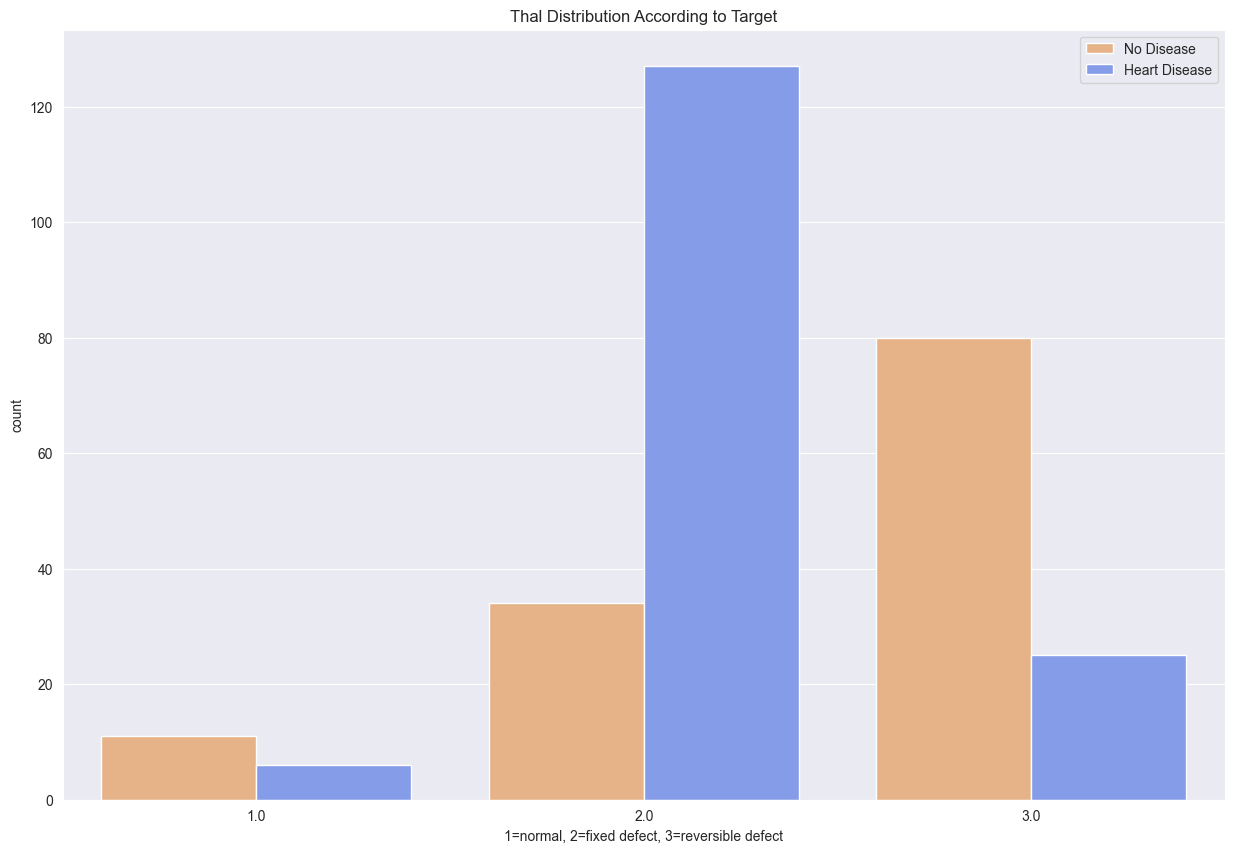

In [79]:
sns.countplot(x = 'thal', hue = 'target', data = df, palette = ["#F4B278", "#7593F8"]).set_title('Thal Distribution According to Target')
plt.legend(labels = ['No Disease', 'Heart Disease'])
plt.xlabel('1=normal, 2=fixed defect, 3=reversible defect')

In [80]:
df.groupby(['target'])['thal'].value_counts()

target  thal
0.0     3.0      80
        2.0      34
        1.0      11
1.0     2.0     127
        3.0      25
        1.0       6
Name: count, dtype: int64

**Insight:** Fitur ini merupakan hasil tes stres talium, yang digunakan untuk menilai aliran darah ke otot jantung. Di sini, Grafik di atas menunjukkan lebih banyak pasien penyakit jantung (127 pasien) yang memiliki fixed defect pada pemindaian thallium, yang berarti terdapat penyumbatan pada arteri koroner.

## Correlation

Text(0.5, 1.0, 'Correlation Between Features')

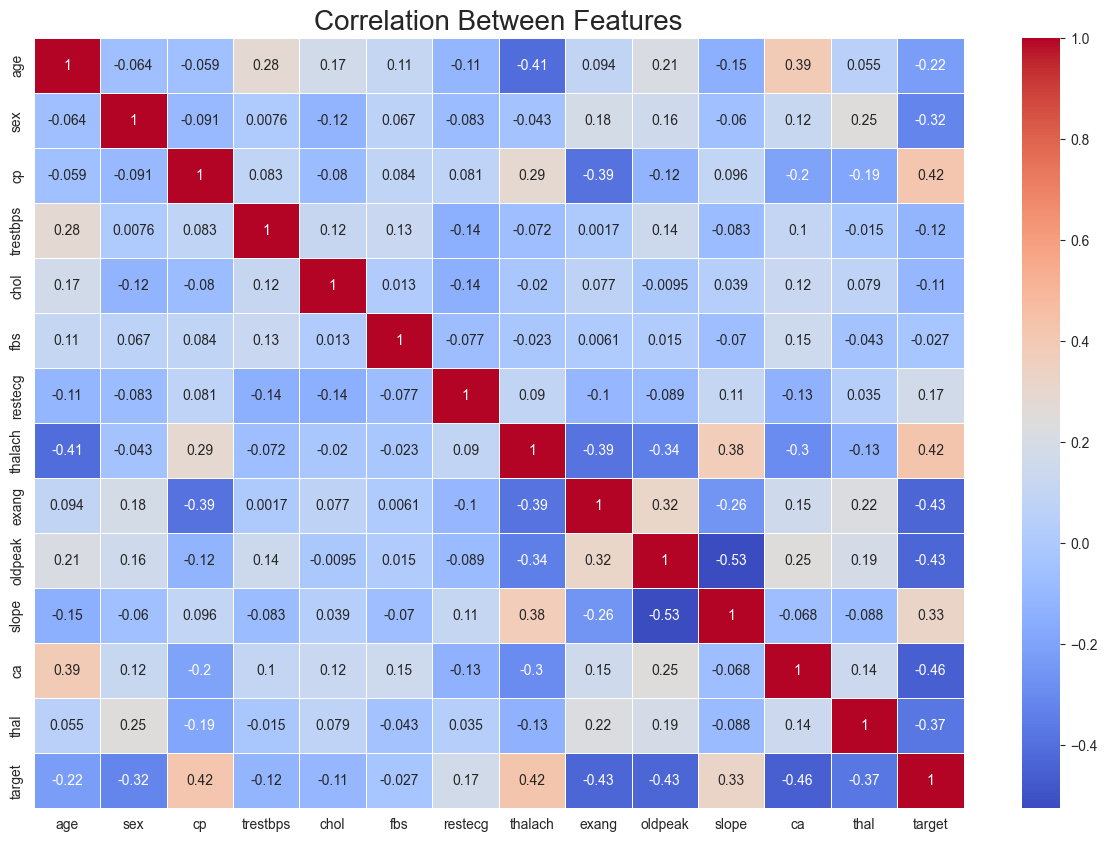

In [81]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(df.corr(), annot = True, linewidths = .5, cmap = "coolwarm")
plt.title('Correlation Between Features', fontsize = 20)

Korelasi positif tertinggi terlihat antara fitur:

*   cp dan target (0.42)
*   thalach dan target (0.42)
*   ca dan age (0.39)

Korelasi negatif tertinggi terlihat antara fitur:
*   oldpeak dan slope (-0.53)
*   ca dan target (-0.46)
*   exang dan target (-0.43)
*   oldpeak dan target (-0.43)
*   age dan thalac (-0.41)
*   cp dan exang (-0.39)



# 3. Feature Engineering

## One-Hot encoding

Kita harus menggunakan one-hot encoding untuk fitur kategorikal seperti cp, restecg, thal, dan slope karena mereka tidak memiliki urutan atau peringkat bawaan. One-hot encoding akan mengubah setiap nilai kategorikal dalam fitur ini menjadi vektor biner 0 dan 1 (0 = False, 1 = True).

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       283 non-null    float64
 1   sex       283 non-null    float64
 2   cp        283 non-null    float64
 3   trestbps  283 non-null    float64
 4   chol      283 non-null    float64
 5   fbs       283 non-null    float64
 6   restecg   283 non-null    float64
 7   thalach   283 non-null    float64
 8   exang     283 non-null    float64
 9   oldpeak   283 non-null    float64
 10  slope     283 non-null    float64
 11  ca        283 non-null    float64
 12  thal      283 non-null    float64
 13  target    283 non-null    float64
dtypes: float64(14)
memory usage: 33.2 KB


In [83]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0.0
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0
4,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,2.0,0.0


In [84]:
cp = pd.get_dummies(df['cp'], prefix = 'cp')
restecg = pd.get_dummies(df['restecg'], prefix = 'restecg')
thal = pd.get_dummies(df['thal'], prefix = 'thal')
slope = pd.get_dummies(df['slope'], prefix = 'slope')


# Merge Dummy Variables to Main Data Frame
frames = [df, cp, restecg, thal, slope]
df = pd.concat(frames, axis = 1)

In [85]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_3.0,restecg_0.0,restecg_1.0,restecg_2.0,thal_1.0,thal_2.0,thal_3.0,slope_0.0,slope_1.0,slope_2.0
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,...,False,False,True,False,False,False,True,False,False,True
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,...,False,True,False,False,False,False,True,True,False,False
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,...,False,False,True,False,False,False,True,True,False,False
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,...,False,False,True,False,False,False,True,False,False,True
4,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,...,False,False,True,False,False,True,False,False,True,False


Dan variabel yang tidak diperlukan akan didelete (cp, restecg, thal, dan slope)

In [86]:
df.drop(columns = ['cp', 'restecg', 'thal', 'slope'], inplace = True)

In [87]:
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,cp_3.0,restecg_0.0,restecg_1.0,restecg_2.0,thal_1.0,thal_2.0,thal_3.0,slope_0.0,slope_1.0,slope_2.0
0,52.0,1.0,125.0,212.0,0.0,168.0,0.0,1.0,2.0,0.0,...,False,False,True,False,False,False,True,False,False,True
1,53.0,1.0,140.0,203.0,1.0,155.0,1.0,3.1,0.0,0.0,...,False,True,False,False,False,False,True,True,False,False
2,70.0,1.0,145.0,174.0,0.0,125.0,1.0,2.6,0.0,0.0,...,False,False,True,False,False,False,True,True,False,False
3,61.0,1.0,148.0,203.0,0.0,161.0,0.0,0.0,1.0,0.0,...,False,False,True,False,False,False,True,False,False,True
4,62.0,0.0,138.0,294.0,1.0,106.0,0.0,1.9,3.0,0.0,...,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68.0,0.0,120.0,211.0,0.0,115.0,0.0,1.5,0.0,1.0,...,False,True,False,False,False,True,False,False,True,False
733,44.0,0.0,108.0,141.0,0.0,175.0,0.0,0.6,0.0,1.0,...,False,False,True,False,False,True,False,False,True,False
739,52.0,1.0,128.0,255.0,0.0,161.0,1.0,0.0,1.0,0.0,...,False,False,True,False,False,False,True,False,False,True
843,59.0,1.0,160.0,273.0,0.0,125.0,0.0,0.0,0.0,0.0,...,True,True,False,False,False,True,False,False,False,True


# 4. Machine Learning Model

## Model Selection

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Split dataset into features and target
X = df.drop(columns=['target'])
y = df['target']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Make predictions
y_pred = model_rf.predict(X_test)



# Evaluate model performance
accuracy_rf = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Random Forest Accuracy:", accuracy_rf)
print("\nClassification Report:\n", classification_rep)

Random Forest Accuracy: 0.8596491228070176

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.81      0.84        26
         1.0       0.85      0.90      0.88        31

    accuracy                           0.86        57
   macro avg       0.86      0.86      0.86        57
weighted avg       0.86      0.86      0.86        57



In [89]:
model_lr = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model_lr.fit(X_train, y_train)

# Make predictions
y_pred = model_lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy_lr)
print("\nClassification Report:\n", classification_rep)

Logistic Regression Accuracy: 0.8596491228070176

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.81      0.84        26
         1.0       0.85      0.90      0.88        31

    accuracy                           0.86        57
   macro avg       0.86      0.86      0.86        57
weighted avg       0.86      0.86      0.86        57



c:\Users\efend\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
from xgboost import XGBClassifier

# Initialize XGBoost model
model_xgb = XGBClassifier(random_state=42)

# Train the model
model_xgb.fit(X_train, y_train)

# Make predictions
y_pred = model_xgb.predict(X_test)

# Evaluate model performance
accuracy_xgb = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("XGboost Accuracy:", accuracy_xgb)
print("\nClassification Report:\n", classification_rep)

XGboost Accuracy: 0.8070175438596491

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.73      0.78        26
         1.0       0.79      0.87      0.83        31

    accuracy                           0.81        57
   macro avg       0.81      0.80      0.80        57
weighted avg       0.81      0.81      0.81        57



In [92]:
from sklearn.svm import SVC

# Initializing and training the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Making predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluating the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep = classification_report(y_test, y_pred)
print("SVM Accuracy:", accuracy_svm)
print("\nClassification Report:\n", classification_rep)

SVM Accuracy: 0.8421052631578947

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.73      0.78        26
         1.0       0.79      0.87      0.83        31

    accuracy                           0.81        57
   macro avg       0.81      0.80      0.80        57
weighted avg       0.81      0.81      0.81        57



In [93]:
from sklearn.neighbors import KNeighborsClassifier

# Initializing and training the k-NN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Making predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluating the model
classification_rep = classification_report(y_test, y_pred)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("k-NN Accuracy:", accuracy_knn)
print("\nClassification Report:\n", classification_rep)

k-NN Accuracy: 0.631578947368421

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.73      0.78        26
         1.0       0.79      0.87      0.83        31

    accuracy                           0.81        57
   macro avg       0.81      0.80      0.80        57
weighted avg       0.81      0.81      0.81        57



In [94]:
# Initializing and training the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Making predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluating the model
classification_rep = classification_report(y_test, y_pred)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)
print("\nClassification Report:\n", classification_rep)

Decision Tree Accuracy: 0.7192982456140351

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.73      0.78        26
         1.0       0.79      0.87      0.83        31

    accuracy                           0.81        57
   macro avg       0.81      0.80      0.80        57
weighted avg       0.81      0.81      0.81        57



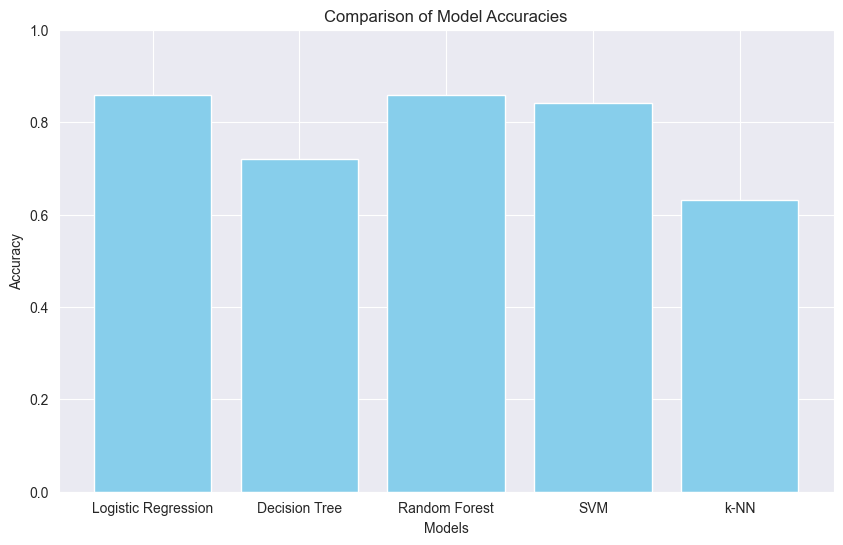

Logistic Regression accuracy is: 0.8596491228070176
Decision Tree accuracy is: 0.7192982456140351
Random Forest accuracy is: 0.8596491228070176
SVM accuracy is: 0.8421052631578947
k-NN accuracy is: 0.631578947368421


In [95]:
# List of model names
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'k-NN']

# List of accuracies
accuracies = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_svm, accuracy_knn]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.show()

for model, accuracy in zip(models, accuracies):
    print(f'{model} accuracy is: {accuracy}')

Dari ke-5 model machine learning yang dijalankan, model Random Forest dan Logistic Regression memiliki akurasi yang sama yaitu 0.85.

Untuk dataset ini saya akan memilih model Random Forest karna dataset yang tersedia merupakan dataset yang cocok dengan metode Klasifikasi, dan dataset ini tidak memiliki karakteristik data yang kontinu atau berkelanjutan

# 5. Metrics Evaluation

## Actual & Predicted

In [96]:
result = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
result

,Actual,Predicted
10,1.0,1
473,1.0,1
191,1.0,1
334,0.0,0
95,1.0,1
643,1.0,1
582,1.0,1
232,0.0,0
49,0.0,0
252,0.0,0


## Confusion Matrix

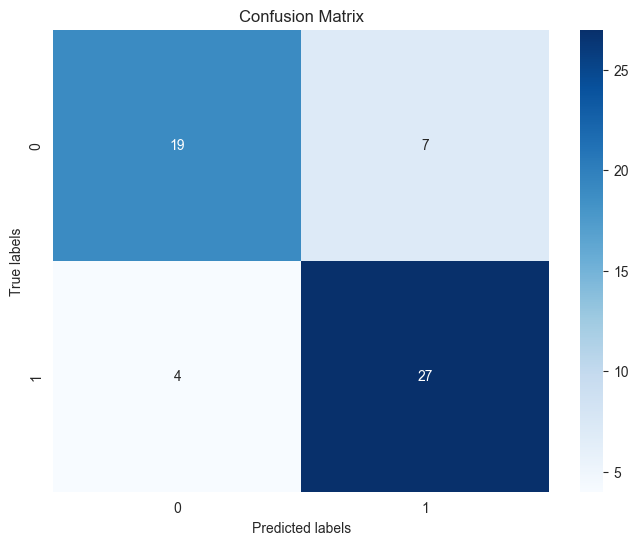

In [97]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Menampilkan matriks kebingungan menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Pada confussion matrix diatas ditunjukkan bahwa prediksi 0 adalah 0 = 21, prediksi 0 adalah 1 = 5, prediksi 1 adalah 0 = 3, dan prediksi 1 adalah 1 = 28.

Yang artinya model bekerja cukup baik dengan data test yang diberikan dan menujukkan hasil yang cukup baik untuk memprediksi pasien yang positif Heart Disease

In [98]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model_rf, X, y, cv=10)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print average cross-validation score
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.86206897 0.75862069 0.86206897 0.89285714 0.82142857 0.89285714
 0.85714286 0.78571429 0.85714286 0.82142857]
Average cross-validation score: 0.8411330049261083
